# 갭마인더 데이터 집합 불러오기

In [2]:
import pandas as pd 
df = pd.read_csv('../data/gapminder.tsv', sep='\t')

# 불러온 데이터 집합 살펴보기

In [7]:
print(df.head())
print(type(df)) # 자료형 
print(df.shape) # 행과 열의 크기
print(df.columns) # 열 이름 확인
print(df.dtypes) # 값의 자료형
print(df.info())

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106
<class 'pandas.core.frame.DataFrame'>
(1704, 6)
Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')
country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
mem


# 열 단위로 데이터 추출하기

In [8]:
# 1개의 열만 추출하면 Series
country_df = df['country']
print(type(country_df))
print(country_df.head()) # 
print(country_df.tail())

<class 'pandas.core.series.Series'>
0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object
1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object


In [10]:
# 2개 이상의 열을 추출하면 Dataframe
subset = df[['country', 'continent','year']]
print(type(subset))
print(subset.head())
print(subset.tail())

<class 'pandas.core.frame.DataFrame'>
       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972
       country continent  year
1699  Zimbabwe    Africa  1987
1700  Zimbabwe    Africa  1992
1701  Zimbabwe    Africa  1997
1702  Zimbabwe    Africa  2002
1703  Zimbabwe    Africa  2007


# loc 속성으로 행 단위 데이터 추출하기

In [12]:
# loc : 인덱스를 기준으로 행 데이터 추출
# iloc : 행 번호를 기준으로 행 데이터 추출

print(df.loc[0]) # index가 0인 행 데이터 
print(df.loc[99]) # index가 99인 행 데이터
#print(df.loc[-1]) # 인덱스에 없는 값을 사용하면 에러

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object
country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap       721.186
Name: 99, dtype: object


In [15]:
## 마지막 행 데이터 추출
# shape[0] : 행 크기 
last_row_index = df.shape[0] - 1
print(df.loc[last_row_index])


# tail() 이용
print(df.tail(n=1))

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object
       country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298


In [16]:
# 인덱스가 0, 99, 999인 데이터 한번에 추출
print(df.loc[[0, 99, 999]])

         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130


# tail과 loc는 조금 달라요!

In [17]:
# loc() -> Series 반환
# tail() -> DataFrame 반환

subset_loc = df.loc[0]
subset_tail = df.tail(n=1)

print(type(subset_loc))
print(type(subset_tail))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


# iloc 속성으로 행 단위 데이터 추출하기

In [18]:
# iloc : 행 번호를 기준으로 
print(df.iloc[1])
print(df.iloc[99])
print(df.iloc[-1]) # 마지막 행 데이터 추출

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap        820.853
Name: 1, dtype: object
country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap       721.186
Name: 99, dtype: object


In [19]:
# 여러 데이터 추출
print(df.iloc[[0,99, 999]])

         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130


# 파이썬 슬라이싱 구문을 조합하여 원하는 데이터 추출하기

In [20]:
# 모든 행(:)에 대해 특정 열 추출
# loc 속성은 열 지정값에 문자열 리스트를 전달
subset = df.loc[:, ['year','pop']]
print(subset.head())

   year       pop
0  1952   8425333
1  1957   9240934
2  1962  10267083
3  1967  11537966
4  1972  13079460


In [21]:
# iloc 속성은 열 지정값에 정수 리스트를 전달
subset = df.iloc[:, [2, 4, -1]]
print(subset.head())

   year       pop   gdpPercap
0  1952   8425333  779.445314
1  1957   9240934  820.853030
2  1962  10267083  853.100710
3  1967  11537966  836.197138
4  1972  13079460  739.981106


# iloc 속성과 range 메서드로 원하는 데이터 추출하기

In [28]:
print(list(range(5))) # range는 제너레이터를 반환하기 때문에 list로 형 변환

subset = df.iloc[:, list(range(5))]
print(subset.head())

subset = df.iloc[:, list(range(3, 6))]
print(subset.head())

subset = df.iloc[:, list(range(0, 6, 2))]
print(subset.head())

[0, 1, 2, 3, 4]
       country continent  year  lifeExp       pop
0  Afghanistan      Asia  1952   28.801   8425333
1  Afghanistan      Asia  1957   30.332   9240934
2  Afghanistan      Asia  1962   31.997  10267083
3  Afghanistan      Asia  1967   34.020  11537966
4  Afghanistan      Asia  1972   36.088  13079460
   lifeExp       pop   gdpPercap
0   28.801   8425333  779.445314
1   30.332   9240934  820.853030
2   31.997  10267083  853.100710
3   34.020  11537966  836.197138
4   36.088  13079460  739.981106
       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460


# 열 지정값에 파이썬 슬라이싱을 사용하여 원하는 데이터 추출하기

In [30]:
subset = df.iloc[:, :3] # 행은 전체 열은 0 ~ 2까지(list(range(3)) 과 동일)
print(subset.head())

subset = df.iloc[:, 0:6:2] # list(ragne(0,6,2) 와 동일
print(subset.head())

       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972
       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460


# loc, iloc 자유자재로 사용하기

In [31]:
# iloc 
# 0, 99, 999번째 행의 0, 3, 5번째 열 데이터를 추출
print(df.iloc[[0,99,999], [0,3,5]])

         country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130


In [32]:
# loc
print(df.loc[[0,99,999], ['country','lifeExp','gdpPercap']])

         country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130


In [33]:
print(df.loc[10:13, ['country','lifeExp','gdpPercap']])

        country  lifeExp    gdpPercap
10  Afghanistan   42.129   726.734055
11  Afghanistan   43.828   974.580338
12      Albania   55.230  1601.056136
13      Albania   59.280  1942.284244


# 그룹화한 데이터의 평균 구하기

In [34]:
# 연도별(year)로 lifeExp 열의 평균을 계산
print(df.groupby('year')['lifeExp'].mean())
print(df.groupby('year')['lifeExp'].mean())

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [35]:
# year, continent 열로 그룹화 후 lifeExp, gdpPercap 열의 평균값
mulit_group_var = df.groupby(['year','continent'])[['lifeExp','gdpPercap']].mean()
print(mulit_group_var)

                  lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699


# 그룹화한 데이터의 개수 세어보기

In [36]:
# continent 기준으로 그룹화 후 country열의 빈도수 계산
# nunique() : 빈도수 계산
print(df.groupby('continent')['country'].nunique())

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64


# 그래프 만들기

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

global_yearly_life_expectancy = df.groupby('year')['lifeExp'].mean()
print(global_yearly_life_expectancy)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


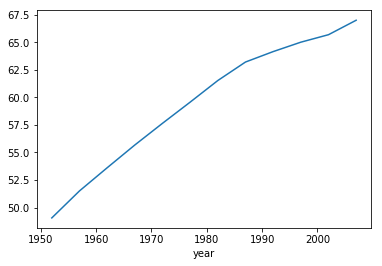

In [39]:
global_yearly_life_expectancy.plot()